In [79]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import statsmodels.formula.api as smf
import statsmodels.api as sm
matplotlib.style.use(['seaborn-talk', 'seaborn-ticks', 'seaborn-whitegrid'])
plt.rcParams['figure.figsize'] = (15, 7)

In [80]:
conn_string = 'mysql://{user}:{password}@{host}:{port}/{db}'.format(
    user='root',
    password='P5mwahopkq8FKqnD',
    host='35.236.242.29',
    port=3306,
    db='sterncfe')
engine = create_engine(conn_string)

In [81]:
query = '''
SELECT*
FROM cfe
'''

df = pd.read_sql(query, con=engine)
df.replace('', np.nan, inplace=True)
df.dropna(axis=0, inplace=True)
df

,semester,course_num,class_name,prof_name,students_registered,num_responses,expected_grade,preparedness,communication,motivation,overall_instructor,challenging,demanding,interest,overall_course,recommendation_score
0,2007 FALL,C10.0001.001,PRIN OF FINANCIAL ACCTG,BARTOV,70,42,3.6,6.1,5.6,5.1,5.7,5.3,5.5,5.1,5.6,5.4
1,2007 FALL,C10.0001.002,PRIN OF FINANCIAL ACCTG,KLEIN,70,31,3.5,7.0,6.7,6.3,6.7,6.4,6.1,5.8,6.3,6.2
2,2007 FALL,C10.0001.003,PRIN OF FINANCIAL ACCTG,KLEIN,69,30,3.6,6.3,6.1,5.5,6.1,5.1,5.8,5.0,5.7,5.7
3,2007 FALL,C10.0001.004,PRIN OF FINANCIAL ACCTG,HIPSCHER,70,39,3.4,6.6,6.3,6.3,6.4,6.3,6.0,5.6,6.0,6.0
4,2007 FALL,C10.0001.005,PRIN OF FINANCIAL ACCTG,CHOI,70,38,3.4,6.8,6.6,6.4,6.7,6.6,6.1,5.7,6.4,6.3
5,2007 FALL,C10.0001.006,PRIN OF FINANCIAL ACCTG,CARRIZOSA,43,26,3.6,6.4,6.2,5.8,6.2,5.7,5.7,4.9,5.6,5.5
6,2007 FALL,C10.0001.007,PRIN OF FINANCIAL ACCTG,STEWART,58,38,3.7,6.8,6.8,6.5,6.8,6.4,6.1,5.9,6.4,6.4
7,2007 FALL,C10.0002.002,PRIN OF MANAGERIAL ACCTG,MAINDIRATTA,48,22,3.2,6.4,5.2,4.6,5.3,5.4,5.4,4.5,4.7,4.3
8,2007 FALL,C10.0002.004,PRIN OF MANAGERIAL ACCTG,MAINDIRATTA,47,16,3.6,6.5,5.9,4.9,5.8,5.2,5.4,4.3,5.2,4.8
9,2007 FALL,C10.0002.006,PRIN OF MANAGERIAL ACCTG,DONTOH,46,19,3.5,4.5,4.8,4.8,4.6,4.8,4.8,4.1,4.4,4.5


In [82]:
df['response_rate'] = df['num_responses'] / df['students_registered']

#df.iloc[:,4:]
df

,semester,course_num,class_name,prof_name,students_registered,num_responses,expected_grade,preparedness,communication,motivation,overall_instructor,challenging,demanding,interest,overall_course,recommendation_score,response_rate
0,2007 FALL,C10.0001.001,PRIN OF FINANCIAL ACCTG,BARTOV,70,42,3.6,6.1,5.6,5.1,5.7,5.3,5.5,5.1,5.6,5.4,0.600000
1,2007 FALL,C10.0001.002,PRIN OF FINANCIAL ACCTG,KLEIN,70,31,3.5,7.0,6.7,6.3,6.7,6.4,6.1,5.8,6.3,6.2,0.442857
2,2007 FALL,C10.0001.003,PRIN OF FINANCIAL ACCTG,KLEIN,69,30,3.6,6.3,6.1,5.5,6.1,5.1,5.8,5.0,5.7,5.7,0.434783
3,2007 FALL,C10.0001.004,PRIN OF FINANCIAL ACCTG,HIPSCHER,70,39,3.4,6.6,6.3,6.3,6.4,6.3,6.0,5.6,6.0,6.0,0.557143
4,2007 FALL,C10.0001.005,PRIN OF FINANCIAL ACCTG,CHOI,70,38,3.4,6.8,6.6,6.4,6.7,6.6,6.1,5.7,6.4,6.3,0.542857
5,2007 FALL,C10.0001.006,PRIN OF FINANCIAL ACCTG,CARRIZOSA,43,26,3.6,6.4,6.2,5.8,6.2,5.7,5.7,4.9,5.6,5.5,0.604651
6,2007 FALL,C10.0001.007,PRIN OF FINANCIAL ACCTG,STEWART,58,38,3.7,6.8,6.8,6.5,6.8,6.4,6.1,5.9,6.4,6.4,0.655172
7,2007 FALL,C10.0002.002,PRIN OF MANAGERIAL ACCTG,MAINDIRATTA,48,22,3.2,6.4,5.2,4.6,5.3,5.4,5.4,4.5,4.7,4.3,0.458333
8,2007 FALL,C10.0002.004,PRIN OF MANAGERIAL ACCTG,MAINDIRATTA,47,16,3.6,6.5,5.9,4.9,5.8,5.2,5.4,4.3,5.2,4.8,0.340426
9,2007 FALL,C10.0002.006,PRIN OF MANAGERIAL ACCTG,DONTOH,46,19,3.5,4.5,4.8,4.8,4.6,4.8,4.8,4.1,4.4,4.5,0.413043


In [83]:
pivot = df.pivot_table(index = 'prof_name')
pivot

,challenging,communication,demanding,expected_grade,interest,motivation,num_responses,overall_course,overall_instructor,preparedness,recommendation_score,response_rate,students_registered
prof_name,,,,,,,,,,,,,
ABRANTES-METZ,5.200000,4.633333,4.400000,3.433333,5.066667,4.166667,11.000000,4.866667,4.566667,5.433333,4.533333,0.521719,21.000000
ADAMOPOULOS,6.600000,6.800000,4.100000,3.900000,6.400000,6.800000,18.000000,6.700000,6.900000,6.900000,6.400000,0.642857,28.000000
AGRAWAL,6.415000,6.720000,4.700000,3.560000,5.915000,6.500000,42.750000,6.385000,6.700000,6.730000,6.360000,0.650783,65.250000
AHARONSON,4.133333,4.144444,5.066667,3.566667,4.133333,3.977778,29.444444,4.322222,4.422222,4.788889,4.022222,0.644997,45.000000
ALLES,3.300000,2.150000,4.300000,3.400000,1.750000,1.800000,38.500000,2.250000,2.050000,3.100000,1.800000,0.606027,63.500000
ALTER,5.393333,6.626667,4.533333,3.546667,5.560000,6.120000,39.933333,6.080000,6.473333,6.560000,6.066667,0.745411,53.600000
AMIHUD,6.466667,5.722222,5.177778,3.433333,5.944444,5.933333,10.555556,6.077778,5.955556,6.422222,5.822222,0.428507,24.111111
APPELBAUM,6.500000,6.200000,5.800000,5.800000,6.200000,5.800000,4.000000,5.800000,6.200000,5.500000,6.200000,0.222222,18.000000
ARAL,5.514286,6.671429,5.314286,3.614286,5.557143,6.100000,33.571429,5.885714,6.485714,6.542857,5.685714,0.650508,51.142857


In [84]:
df['grade/challenging'] = df['expected_grade'] / df['challenging']
df['grade/demanding'] = df['expected_grade'] / df['demanding']
df['overall/motivation'] = df['overall_instructor'] / df['motivation']
df['overall/preparedness'] = df['overall_instructor'] / df['preparedness']
df

,semester,course_num,class_name,prof_name,students_registered,num_responses,expected_grade,preparedness,communication,motivation,...,challenging,demanding,interest,overall_course,recommendation_score,response_rate,grade/challenging,grade/demanding,overall/motivation,overall/preparedness
0,2007 FALL,C10.0001.001,PRIN OF FINANCIAL ACCTG,BARTOV,70,42,3.6,6.1,5.6,5.1,...,5.3,5.5,5.1,5.6,5.4,0.600000,0.679245,0.654545,1.117647,0.934426
1,2007 FALL,C10.0001.002,PRIN OF FINANCIAL ACCTG,KLEIN,70,31,3.5,7.0,6.7,6.3,...,6.4,6.1,5.8,6.3,6.2,0.442857,0.546875,0.573770,1.063492,0.957143
2,2007 FALL,C10.0001.003,PRIN OF FINANCIAL ACCTG,KLEIN,69,30,3.6,6.3,6.1,5.5,...,5.1,5.8,5.0,5.7,5.7,0.434783,0.705882,0.620690,1.109091,0.968254
3,2007 FALL,C10.0001.004,PRIN OF FINANCIAL ACCTG,HIPSCHER,70,39,3.4,6.6,6.3,6.3,...,6.3,6.0,5.6,6.0,6.0,0.557143,0.539683,0.566667,1.015873,0.969697
4,2007 FALL,C10.0001.005,PRIN OF FINANCIAL ACCTG,CHOI,70,38,3.4,6.8,6.6,6.4,...,6.6,6.1,5.7,6.4,6.3,0.542857,0.515152,0.557377,1.046875,0.985294
5,2007 FALL,C10.0001.006,PRIN OF FINANCIAL ACCTG,CARRIZOSA,43,26,3.6,6.4,6.2,5.8,...,5.7,5.7,4.9,5.6,5.5,0.604651,0.631579,0.631579,1.068966,0.968750
6,2007 FALL,C10.0001.007,PRIN OF FINANCIAL ACCTG,STEWART,58,38,3.7,6.8,6.8,6.5,...,6.4,6.1,5.9,6.4,6.4,0.655172,0.578125,0.606557,1.046154,1.000000
7,2007 FALL,C10.0002.002,PRIN OF MANAGERIAL ACCTG,MAINDIRATTA,48,22,3.2,6.4,5.2,4.6,...,5.4,5.4,4.5,4.7,4.3,0.458333,0.592593,0.592593,1.152174,0.828125
8,2007 FALL,C10.0002.004,PRIN OF MANAGERIAL ACCTG,MAINDIRATTA,47,16,3.6,6.5,5.9,4.9,...,5.2,5.4,4.3,5.2,4.8,0.340426,0.692308,0.666667,1.183673,0.892308
9,2007 FALL,C10.0002.006,PRIN OF MANAGERIAL ACCTG,DONTOH,46,19,3.5,4.5,4.8,4.8,...,4.8,4.8,4.1,4.4,4.5,0.413043,0.729167,0.729167,0.958333,1.022222


In [85]:
pivot = pd.pivot_table(data = df,
                       index = ['class_name', 'prof_name'],
                       values = ['grade/challenging', 'grade/demanding', 'recommendation_score', 'overall_course', 'expected_grade', 'overall/motivation','overall/preparedness']
                      )
search = pivot.index.get_level_values('class_name') == "FOUNDATIONS OF FINANCE"
pivot[search].sort_values(by='expected_grade', ascending=False)#.plot(kind = 'barh')
pivot[search].head(1).index.get_level_values('prof_name')[0]

'BROWN'

In [86]:
pivot = pd.pivot_table(data = df,
                      index = 'prof_name',
                      values = 'overall_instructor')
pivot.sort_values(by='overall_instructor', ascending=False)

,overall_instructor
prof_name,
SZOKE,7.000000
WOOD,7.000000
MADIA,7.000000
WEGHMAN,7.000000
NORTH,6.950000
SOMERSTEIN,6.933333
HANSSEN,6.907692
ADAMOPOULOS,6.900000
DEMIRTAS,6.900000


In [8]:
pivot = pd.pivot_table(data = df,
                      index = ['class_name','semester'],
                      values = ['expected_grade','recommendation_score','grade/challenging'])
search = pivot.index.get_level_values('class_name') == "FOUNDATIONS OF FINANCE"
pivot[search]

expected_grade  grade/challenging  \
class_name             semester                                         
FOUNDATIONS OF FINANCE 2011 FALL          3.471429           0.547700   
                       2012 FALL          3.528571           0.570147   
                       2012 SPRING        3.500000           0.573298   
                       2013 FALL          3.442857           0.540624   
                       2013 SPRING        3.520000           0.576743   
                       2014 FALL          3.471429           0.562865   
                       2014 SPRING        3.525000           0.663298   
                       2015 FALL          3.444444           0.556624   
                       2015 SPRING        3.450000           0.585050   
                       2016 FALL          3.583333           0.581039   
                       2016 SPRING        3.550000           0.584415   
                       2017 FALL          3.566667           0.562246   
                       2017 SPRING        3.340000           0.530326   
                       2018 SPRING        3.325000           0.533015   

                                    recommendation_score  
class_name             semester                           
FOUNDATIONS OF FINANCE 2011 FALL                5.571429  
                       2012 FALL                5.585714  
                       2012 SPRING              5.440000  
                       2013 FALL                5.685714  
                       2013 SPRING              5.620000  
                       2014 FALL                5.171429  
                       2014 SPRING              4.950000  
                       2015 FALL                5.500000  
                       2015 SPRING              4.625000  
                       2016 FALL                5.983333  
                       2016 SPRING              5.075000  
                       2017 FALL                6.050000  
                       2017 SPRING              5.460000  
                       2018 SPRING              5.375000

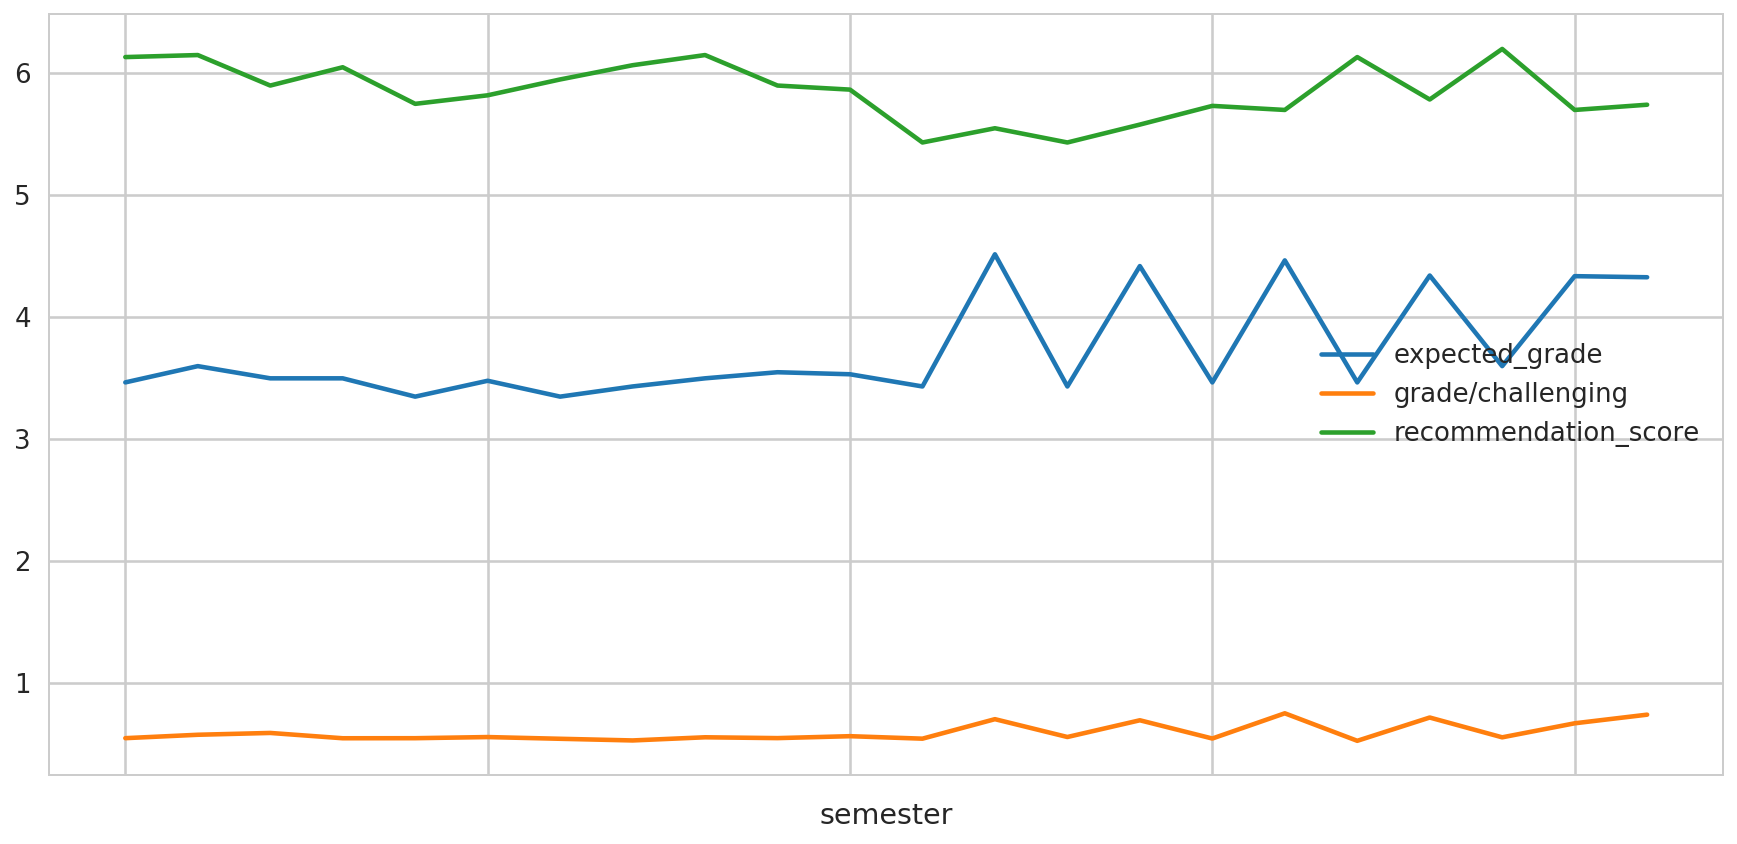

In [98]:
prof_query = 'FOUDY'
pivot = pd.pivot_table(data = df,
                      index = ['prof_name','semester'],
                      values = ['expected_grade','recommendation_score','grade/challenging'])
search = pivot.index.get_level_values('prof_name') == prof_query
#pivot[search]
df1 = pivot[search]
df1 = df1.reset_index()
df1 = df1.drop(columns=['prof_name'])
df1 = df1.set_index('semester')
df1.plot()

,semester,course_num,class_name,prof_name,students_registered,num_responses,expected_grade,preparedness,communication,motivation,overall_instructor,challenging,demanding,interest,overall_course,recommendation_score,response_rate,grade/challenging,grade/demanding
0,2007 FALL,C10.0001.001,PRIN OF FINANCIAL ACCTG,BARTOV,70,42,3.6,6.1,5.6,5.1,5.7,5.3,5.5,5.1,5.6,5.4,0.600000,0.679245,0.654545
1,2007 FALL,C10.0001.002,PRIN OF FINANCIAL ACCTG,KLEIN,70,31,3.5,7.0,6.7,6.3,6.7,6.4,6.1,5.8,6.3,6.2,0.442857,0.546875,0.573770
2,2007 FALL,C10.0001.003,PRIN OF FINANCIAL ACCTG,KLEIN,69,30,3.6,6.3,6.1,5.5,6.1,5.1,5.8,5.0,5.7,5.7,0.434783,0.705882,0.620690
3,2007 FALL,C10.0001.004,PRIN OF FINANCIAL ACCTG,HIPSCHER,70,39,3.4,6.6,6.3,6.3,6.4,6.3,6.0,5.6,6.0,6.0,0.557143,0.539683,0.566667
4,2007 FALL,C10.0001.005,PRIN OF FINANCIAL ACCTG,CHOI,70,38,3.4,6.8,6.6,6.4,6.7,6.6,6.1,5.7,6.4,6.3,0.542857,0.515152,0.557377
5,2007 FALL,C10.0001.006,PRIN OF FINANCIAL ACCTG,CARRIZOSA,43,26,3.6,6.4,6.2,5.8,6.2,5.7,5.7,4.9,5.6,5.5,0.604651,0.631579,0.631579
6,2007 FALL,C10.0001.007,PRIN OF FINANCIAL ACCTG,STEWART,58,38,3.7,6.8,6.8,6.5,6.8,6.4,6.1,5.9,6.4,6.4,0.655172,0.578125,0.606557
7,2007 FALL,C10.0002.002,PRIN OF MANAGERIAL ACCTG,MAINDIRATTA,48,22,3.2,6.4,5.2,4.6,5.3,5.4,5.4,4.5,4.7,4.3,0.458333,0.592593,0.592593
8,2007 FALL,C10.0002.004,PRIN OF MANAGERIAL ACCTG,MAINDIRATTA,47,16,3.6,6.5,5.9,4.9,5.8,5.2,5.4,4.3,5.2,4.8,0.340426,0.692308,0.666667
9,2007 FALL,C10.0002.006,PRIN OF MANAGERIAL ACCTG,DONTOH,46,19,3.5,4.5,4.8,4.8,4.6,4.8,4.8,4.1,4.4,4.5,0.413043,0.729167,0.729167


In [14]:
html = pivot._repr_html_()

In [16]:
pivot.to_html()

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th></th>\n      <th>expected_grade</th>\n      <th>grade/challenging</th>\n      <th>recommendation_score</th>\n    </tr>\n    <tr>\n      <th>prof_name</th>\n      <th>semester</th>\n      <th></th>\n      <th></th>\n      <th></th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th rowspan="3" valign="top">ABRANTES-METZ</th>\n      <th>2009 SPRING</th>\n      <td>3.200000</td>\n      <td>0.640000</td>\n      <td>3.900000</td>\n    </tr>\n    <tr>\n      <th>2012 SPRING</th>\n      <td>3.400000</td>\n      <td>0.723404</td>\n      <td>4.100000</td>\n    </tr>\n    <tr>\n      <th>2013 SPRING</th>\n      <td>3.700000</td>\n      <td>0.627119</td>\n      <td>5.600000</td>\n    </tr>\n    <tr>\n      <th>ADAMOPOULOS</th>\n      <th>2014 SPRING</th>\n      <td>3.900000</td>\n      <td>0.590909</td>\n      <td>6.400000</td>\n    </tr>\n    <tr>\n      <th rowspan="8" valign="t

In [18]:
pivot['grade/challenging']

prof_name      semester   
ABRANTES-METZ  2009 SPRING    0.640000
               2012 SPRING    0.723404
               2013 SPRING    0.627119
ADAMOPOULOS    2014 SPRING    0.590909
AGRAWAL        2009 SPRING    0.568519
               2010 FALL      0.530303
               2010 SPRING    0.561661
               2011 SPRING    0.526584
               2012 SPRING    0.543597
               2013 SPRING    0.548805
               2014 SPRING    0.583146
               2015 SPRING    0.559982
AHARONSON      2009 SPRING    0.775176
               2010 FALL      0.943927
               2010 SPRING    0.923447
ALLES          2009 SPRING    1.038889
ALTER          2010 FALL      0.635168
               2011 FALL      0.632607
               2012 FALL      0.671106
               2013 FALL      0.649123
               2014 FALL      0.703822
               2015 FALL      0.672727
AMIHUD         2008 FALL      0.517241
               2009 FALL      0.530303
               2011 FALL      0.48529

In [22]:
result = smf.ols(formula='overall_instructor~challenging+expected_grade', data=df).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:     overall_instructor   R-squared:                       0.560
Model:                            OLS   Adj. R-squared:                  0.560
Method:                 Least Squares   F-statistic:                     3092.
Date:                Mon, 03 Dec 2018   Prob (F-statistic):               0.00
Time:                        20:40:25   Log-Likelihood:                -4163.0
No. Observations:                4862   AIC:                             8332.
Df Residuals:                    4859   BIC:                             8351.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.7441      0.054     32.

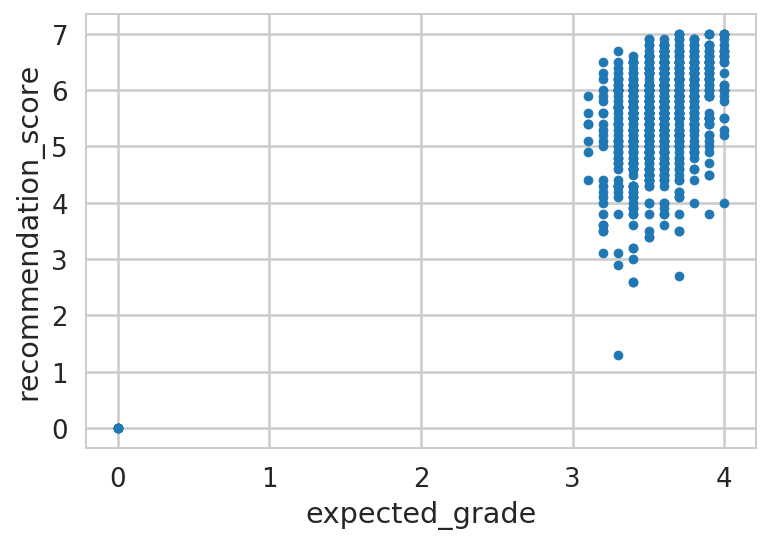

In [68]:
df[(df['expected_grade'] <= 4)].sample(frac = 0.2).plot(x = 'expected_grade', y = 'recommendation_score', kind='scatter')

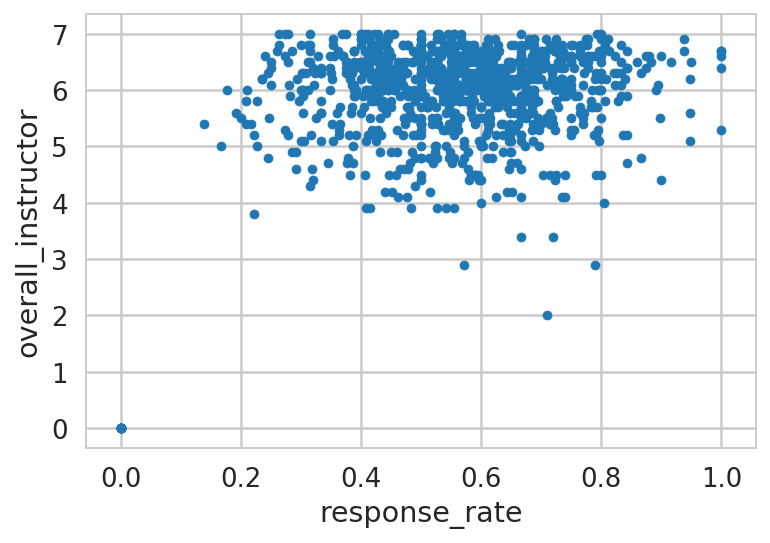

In [64]:
df[(df['response_rate'] <= 1)].sample(frac=0.2).plot(x = 'response_rate', 
                                    y = 'overall_instructor', 
                                    kind='scatter')

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


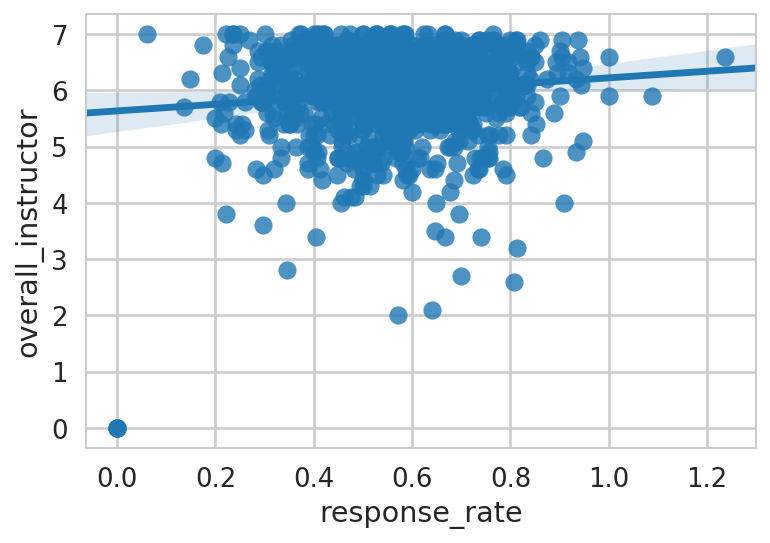

In [66]:
import seaborn as sns
sample = df.sample(frac=0.2)
sns.regplot(sample['response_rate'],sample['overall_instructor'])

In [4]:
import requests

url = 'http://www.stern.nyu.edu/faculty/static/photos/rabrante.jpg'
r = requests.get(url, allow_redirects=True)
open('google.ico', 'wb').write(r.content)

39358

In [28]:
search = "FOUDY"
query = '''
SELECT name, image_url
FROM facial
'''
pd.set_option('display.max_colwidth', -1)
df = pd.read_sql(query, con=engine)
#df.drop_duplicates(['prof_name'])
df1 = df.drop_duplicates()
truth = (df1['name'] == search)
df1.loc[df['name'] == search, 'image_url'].iloc[0]
#df1[truth]['image_url']
#df1

'http://www.stern.nyu.edu/faculty/static/photos/jfoudy.jpg'

In [20]:
search = "FOUDY"
query = '''
select image_url
from facial
'''
pd.set_option('display.max_colwidth', -1)
df = pd.read_sql(query, con=engine)
df

,image_url
0,http://www.stern.nyu.edu/faculty/static/photos/rabrante.jpg
1,http://www.stern.nyu.edu/faculty/static/photos/vacharya.jpg
2,http://www.stern.nyu.edu/faculty/static/photos/aadamson.png
3,http://www.stern.nyu.edu/faculty/static/images/placeholder.gif
4,http://www.stern.nyu.edu/faculty/static/photos/nahmad.jpg
5,http://www.stern.nyu.edu/faculty/static/photos/talbanes.jpg
6,http://www.stern.nyu.edu/faculty/static/photos/wallen.jpg
7,http://www.stern.nyu.edu/faculty/static/photos/aalter.jpg
8,http://www.stern.nyu.edu/faculty/static/photos/daltman.jpg
9,http://www.stern.nyu.edu/faculty/static/photos/ealtman.jpg


In [35]:
#search = "FOUDY"
query = '''
select*
from facial
'''
pd.set_option('display.max_colwidth', -1)
df = pd.read_sql(query, con=engine)
df = df.fillna(0)
pivot = df.pivot_table(index = 'name')
search = pivot.index.get_level_values('name') == 'FOUDY'
pivot[search]

,businessperson,elder,smile,spokesperson
name,,,,
FOUDY,0.749125,0.0,0.0,0.820816


In [38]:
prof_query = 'FOUDY'
query5 = '''
    select prof_name, class_name
    from cfe
    where prof_name = %s
    '''
    
#table = con.execute(query, (prof_query,))
df_courses = pd.read_sql(query5, con=engine, params={prof_query})
#pivot_courses = df_courses.pivot_table(index = 'prof_name')
#pivot_courses
df_courses

,prof_name,class_name
0,FOUDY,ECONOMICS OF GLOBAL
1,FOUDY,ECONOMICS OF GLOBAL
2,FOUDY,ECONOMICS OF GLOBAL
3,FOUDY,INTERNATIONAL STUDIES
4,FOUDY,INTERNATIONAL STUDIES
5,FOUDY,ECONOMICS OF GLOBAL
6,FOUDY,WORLD STUDIES TRACK SEM
7,FOUDY,ECONOMICS OF GLOBAL
8,FOUDY,INTERNATIONAL STUDIES
9,FOUDY,ECONOMICS OF GLOBAL


In [ ]:
select f.name, round(avg(c.overall_instructor),2), round(avg(f.smile),2), round(avg(f.elder,2)), round(avg(f.businessperson,2), round(avg(f.spokesperson,2))
    from cfe c inner join facial f on c.prof_name = f.name
    group by f.name

In [70]:
prof_query = "CORPORATE FINANCE"#"PRIN OF FINANCIAL ACCTG"#"BUSINESS & ITS PUBLICS"
query = '''
    select c.prof_name, c.class_name, c.overall_instructor, c.expected_grade, c.communication, c.motivation, c.interest, c.demanding, c.recommendation_score, f.smile, f.elder, f.businessperson, f.spokesperson
    from cfe c inner join facial f on c.prof_name = f.name
    '''
df = pd.read_sql(query, con=engine)
df = df.fillna(0)
#df['smile'] = df['smile']*7
#df['elder'] = df['elder']*7
#df['businessperson'] = df['businessperson']*7
#df['spokesperson'] = df['spokesperson']*7
#pivot = df.pivot_table(index = 'prof_name')
#df1 = pivot
#df1['smile'] = df1['smile']*7
search = (df["class_name"] == prof_query)
df[search]

,prof_name,class_name,overall_instructor,expected_grade,communication,motivation,interest,demanding,recommendation_score,smile,elder,businessperson,spokesperson
444,SCHNABL,CORPORATE FINANCE,6.7,3.4,6.7,6.4,6.1,4.9,6.4,0.000000,0.000000,0.804014,0.000000
445,SCHNABL,CORPORATE FINANCE,6.7,3.6,6.7,6.4,6.0,4.8,6.4,0.000000,0.000000,0.804014,0.000000
713,WURGLER,CORPORATE FINANCE,5.4,3.5,5.4,4.9,5.2,4.4,5.3,0.700430,0.520917,0.757825,0.000000
714,WURGLER,CORPORATE FINANCE,5.4,3.6,5.2,4.8,5.3,4.6,5.2,0.700430,0.520917,0.757825,0.000000
715,WURGLER,CORPORATE FINANCE,5.4,3.6,5.5,4.9,5.2,4.6,5.5,0.700430,0.520917,0.757825,0.000000
852,SCHNABL,CORPORATE FINANCE,6.6,3.6,6.8,6.5,5.7,4.6,6.2,0.000000,0.000000,0.804014,0.000000
1017,JOHN,CORPORATE FINANCE,4.6,3.9,4.3,4.2,5.1,4.4,4.9,0.000000,0.752019,0.788307,0.655455
1018,WURGLER,CORPORATE FINANCE,5.4,3.7,5.4,4.8,4.9,4.6,5.2,0.700430,0.520917,0.757825,0.000000
1019,WURGLER,CORPORATE FINANCE,5.4,3.5,5.5,4.9,5.1,4.5,5.3,0.700430,0.520917,0.757825,0.000000
1020,WURGLER,CORPORATE FINANCE,5.4,3.5,5.4,4.6,4.9,4.5,5.2,0.700430,0.520917,0.757825,0.000000


In [71]:
result = smf.ols(formula='overall_instructor~smile+elder+businessperson+spokesperson+expected_grade', data=df[search]).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:     overall_instructor   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.120
Method:                 Least Squares   F-statistic:                     2.251
Date:                Wed, 05 Dec 2018   Prob (F-statistic):             0.0672
Time:                        19:36:03   Log-Likelihood:                -32.182
No. Observations:                  47   AIC:                             76.36
Df Residuals:                      41   BIC:                             87.46
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          5.2978      2.312      2.

In [77]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     overall_instructor   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.120
Method:                 Least Squares   F-statistic:                     2.251
Date:                Wed, 05 Dec 2018   Prob (F-statistic):             0.0672
Time:                        20:17:21   Log-Likelihood:                -32.182
No. Observations:                  47   AIC:                             76.36
Df Residuals:                      41   BIC:                             87.46
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          5.2978      2.312      2.292      0.027       0.629       9.966
smile             -0.5987      0.259     -2.307      0.026      -1.123      -0.075
elder             -0.8916      0.328     -2.722      0.009      -1.553      -0.230
businessperson     0.2175      0.330      0.660      0.513      -0.448       0.883
spokesperson      -0.4586      0.360     -1.275      0.209      -1.185       0.268
expected_grade     0.3820      0.652      0.586      0.561      -0.935       1.699
==============================================================================
Omnibus:                        2.819   Durbin-Watson:                   0.814
Prob(Omnibus):                  0.244   Jarque-Bera (JB):                2.168
Skew:                          -0.524   Prob(JB):                        0.338
Kurtosis:                       3.092   Cond. No.                         122.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [102]:
result.summary().__attr__

AttributeError: 'Summary' object has no attribute '__attr__'

In [103]:
result_table_html = result.summary()._repr_html_()
result_table_html

'<table class="simpletable">\n<caption>OLS Regression Results</caption>\n<tr>\n  <th>Dep. Variable:</th>    <td>overall_instructor</td> <th>  R-squared:         </th> <td>   0.215</td>\n</tr>\n<tr>\n  <th>Model:</th>                    <td>OLS</td>        <th>  Adj. R-squared:    </th> <td>   0.120</td>\n</tr>\n<tr>\n  <th>Method:</th>              <td>Least Squares</td>   <th>  F-statistic:       </th> <td>   2.251</td>\n</tr>\n<tr>\n  <th>Date:</th>              <td>Wed, 05 Dec 2018</td>  <th>  Prob (F-statistic):</th>  <td>0.0672</td> \n</tr>\n<tr>\n  <th>Time:</th>                  <td>20:44:14</td>      <th>  Log-Likelihood:    </th> <td> -32.182</td>\n</tr>\n<tr>\n  <th>No. Observations:</th>       <td>    47</td>       <th>  AIC:               </th> <td>   76.36</td>\n</tr>\n<tr>\n  <th>Df Residuals:</th>           <td>    41</td>       <th>  BIC:               </th> <td>   87.46</td>\n</tr>\n<tr>\n  <th>Df Model:</th>               <td>     5</td>       <th>                    

In [55]:
result = smf.ols(formula='recommendation_score~smile+elder+businessperson+spokesperson', data=df).fit()
print(result.summary())

                             OLS Regression Results                             
Dep. Variable:     recommendation_score   R-squared:                       0.012
Model:                              OLS   Adj. R-squared:                  0.011
Method:                   Least Squares   F-statistic:                     11.71
Date:                  Wed, 05 Dec 2018   Prob (F-statistic):           1.88e-09
Time:                          15:41:40   Log-Likelihood:                -4572.7
No. Observations:                  3941   AIC:                             9155.
Df Residuals:                      3936   BIC:                             9187.
Df Model:                             4                                         
Covariance Type:              nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          5.473

In [52]:
query = '''
SELECT `Professor Name`, ROUND(AVG(`Overall Instructor`),2) as AVG_OVERALL
FROM cfe
GROUP BY `Professor Name`
ORDER BY AVG_OVERALL DESC
'''

df = pd.read_sql(query, con=engine)
df.replace('', np.nan, inplace=True)
df.dropna(axis=0, inplace=True)
df

,Professor Name,AVG_OVERALL
0,CARRIZOSA,6.20
1,COLACITO,6.10
2,YEUNG,4.80
3,DE FARIAS,5.10
4,PANO,5.10
5,SEBLANI,5.35
6,SAMEROYNINA,4.80
7,LAM,4.50
8,LUI,6.20
9,SALAZAR,5.20


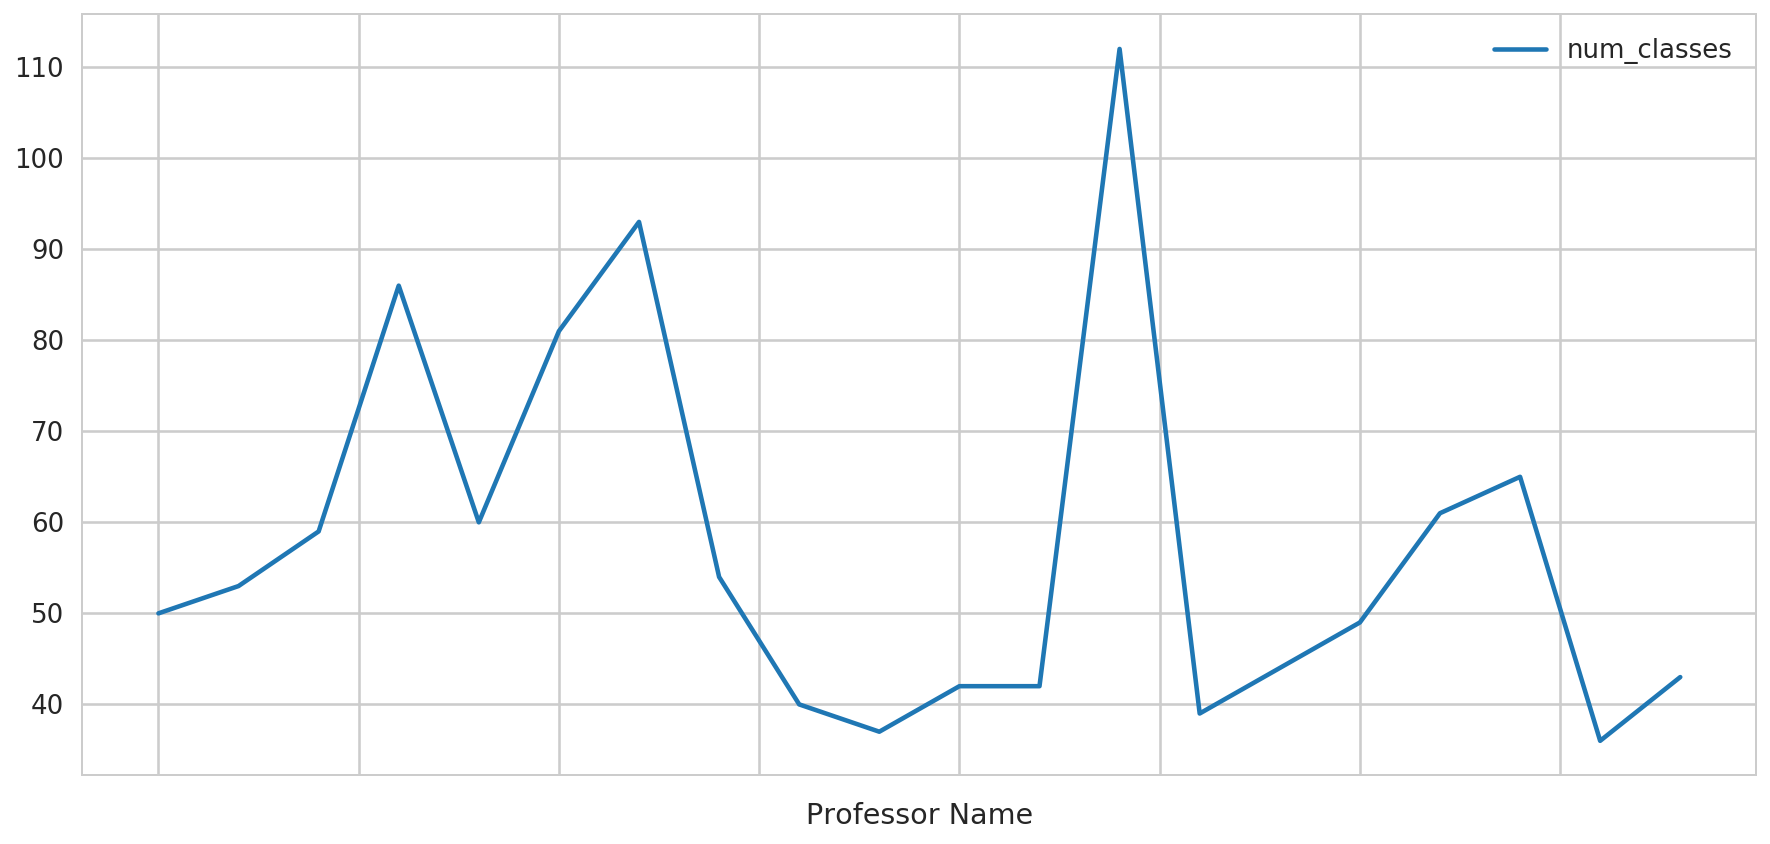

In [71]:
query = '''
SELECT `Professor Name`, COUNT(`Professor Name`) as num_classes
FROM cfe
GROUP BY `Professor Name`
ORDER BY num_classes DESC
LIMIT 20
'''

df = pd.read_sql(query, con=engine)
df.replace('', np.nan, inplace=True)
df.dropna(axis=0, inplace=True)
pivot = df.pivot_table(index = 'Professor Name')
pivot.plot()

In [62]:
prof = ['IPEIROTIS', 'FOUDY']
# How to loop?

query = '''
SELECT `Professor Name`, COUNT(`Professor Name`) AS num_classes, ROUND(AVG(`Overall Instructor`),2) AS avg_overall,
ROUND(AVG(`Expected Grade`),2) AS avg_grade, ROUND(AVG(`Demanding`),2) AS avg_demanding
FROM cfe
WHERE `Professor Name` LIKE 'IPEIROTIS'
GROUP BY `Professor Name`
'''

df = pd.read_sql(query, con=engine)
df.replace('', np.nan, inplace=True)
df.dropna(axis=0, inplace=True)
df

,Professor Name,num_classes,avg_overall,avg_grade,avg_demanding
0,IPEIROTIS,22,6.29,3.7,1.77


In [10]:
xData = df["expected_grade"]
yData = df["overall_instructor"]
xData = sm.add_constant(xData, prepend=False)
mod = sm.OLS(xData, yData)
res = mod.fit()
print(res)

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [17]:
result = smf.ols(formula='Communication~Motivation', data=df).fit()
result.summary()

ValueError: shapes (4862,52) and (4862,52) not aligned: 52 (dim 1) != 4862 (dim 0)

In [14]:
print(result.summary())

ValueError: shapes (4862,52) and (4862,52) not aligned: 52 (dim 1) != 4862 (dim 0)